# Relatório de desmatamento em Minas Gerais (Agosto e Setembro de 2022)


## Contextualização

O desmatamento em Minas Gerais é um desafio ambiental significativo que requer atenção imediata. A compreensão deste problema é essencial para o desenvolvimento de estratégias eficazes de preservação e fiscalização. 

Neste relatório, apresentamos uma análise acessível do desmatamento no estado, utilizando dados sobre municípios, Produto Interno Bruto (PIB), população e focos de desmatamento, coletados a partir de registros obtidos junto ao [IBGE](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html) e outros relatórios de autoria da TerraQ oriundos de projetos anteriores. 

Minas Gerais enfrenta desafios sérios relacionados ao desmatamento ilegal. A identificação de áreas prioritárias para intervenção é crucial para o sucesso de iniciativas de fiscalização e preservação ambiental.

O objetivo deste relatório é fornecer aos gestores públicos percepções visuais claras da situação atual de desmatamento no estado. As visualizações apresentadas visam orientar decisões estratégicas para alocar recursos de maneira eficiente no combate ao desmatamento ilegal.

## Bases de Dados

Para criar insights valiosos sobre o desmatamento em Minas Gerais, utilizamos os seguintes conjuntos de dados para  entender a relação entre desenvolvimento socioeconômico desmatamento e identificar áreas específicas com alta atividade de desmatamento, facilitando a compreensão da distribuição do desmatamento.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
# definir a projeção nos dataframes para EPSG:31983
projecao = 'epsg:31983'

### pop_pib_municipios_mg

Contém informações sobre o PIB e a população de cada município em Minas Gerais.

In [3]:
arquivo = "dados/populacao-pib-municipios-mg.csv"

# transformar o arquivo em um dataframe
pop_pib_municipios_mg = pd.read_csv(arquivo)

pop_pib_municipios_mg

,UF,Municipio,PIB,Populacao
0,MG,Abadia dos Dourados,176.774,7.022
1,MG,Abaeté,541.239,23.263
2,MG,Abre Campo,262.687,13.434
3,MG,Acaiaca,64.907,3.995
4,MG,Açucena,165.824,9.270
...,...,...,...,...
848,MG,Virginópolis,183.953,10.459
849,MG,Virgolândia,62.674,5.303
850,MG,Visconde do Rio Branco,1.351.679,43.351
851,MG,Volta Grande,140.361,5.270


### focos_desmatamento_mg

Fornece dados sobre focos de desmatamento, incluindo bioma, localização e pontuações relacionadas ao desmatamento.

In [4]:
arquivo = "dados/focos-desmatamento-mg.geojson"

# transformar o arquivo em um geodataframe
focos_desmatamento_mg = gpd.read_file(arquivo)

# definir Cias como Tipo Inteiro
focos_desmatamento_mg['Cia PM'] = focos_desmatamento_mg['Cia PM'].astype(int)

# calcular a área para cada geometria em km2
km = 10**6
focos_desmatamento_mg['Area'] = focos_desmatamento_mg['geometry'].area / km

focos_desmatamento_mg

,Bioma,Cena,Cia PM,Data Final,Data Inicial,Instância,Mes,NuFis,Score,geometry,Area
0,Mata Atlântica,22KEC,5,09/09/2022,15/08/2022,56,setembro_22,Triângulo Mineiro,0.94,"POLYGON ((-124558.799 7777208.524, -124607.724...",0.192396
1,Cerrado,22KED,9,24/09/2022,19/09/2022,273,setembro_22,Triângulo Mineiro,0.84,"POLYGON ((-75401.260 7868723.867, -75037.724 7...",4.682308
2,Cerrado,22KED,5,24/09/2022,19/09/2022,274,setembro_22,Triângulo Mineiro,0.81,"POLYGON ((-63866.920 7861093.781, -63927.596 7...",0.588586
3,Cerrado,22KED,5,24/09/2022,19/09/2022,275,setembro_22,Triângulo Mineiro,0.83,"POLYGON ((-40818.650 7858893.116, -40777.961 7...",0.391773
4,Cerrado,22KED,5,24/09/2022,19/09/2022,276,setembro_22,Triângulo Mineiro,0.9,"POLYGON ((-32119.895 7858592.513, -32167.326 7...",0.177481
...,...,...,...,...,...,...,...,...,...,...,...
2034,Mata Atlântica,24LTH,15,22/06/2022,12/06/2022,14277,agosto_22,Jequitinhonha,0.92,"POLYGON ((929733.458 8249632.458, 929841.657 8...",0.082915
2035,Mata Atlântica,24LTH,15,22/06/2022,17/06/2022,14507,agosto_22,Jequitinhonha,0.9,"POLYGON ((865579.305 8254142.756, 865667.952 8...",0.023800
2036,Mata Atlântica,24LUH,15,17/06/2022,07/06/2022,14842,agosto_22,Jequitinhonha,0.93,"POLYGON ((1004217.190 8208186.158, 1004354.862...",0.082065
2037,Mata Atlântica,24LUH,15,17/06/2022,07/06/2022,14843,agosto_22,Jequitinhonha,0.91,"POLYGON ((1005214.194 8208255.048, 1005509.008...",0.083022


### municipios_mg

Inclui dados geoespaciais dos municípios em Minas Gerais.

In [5]:
arquivo = "dados/municipios-mg.geojson"

# transformar o arquivo em um geodataframe
municipios_mg = gpd.read_file(arquivo)

municipios_mg

,id,municipio,area,geometry
0,3100104,Abadia dos Dourados,895.115178,"POLYGON ((241429.802 7990562.876, 242359.697 7..."
1,3100203,Abaeté,1814.504046,"POLYGON ((480831.209 7911603.048, 481764.623 7..."
2,3100302,Abre Campo,472.049598,"POLYGON ((775002.321 7771717.815, 776244.590 7..."
3,3100401,Acaiaca,100.723996,"POLYGON ((696872.185 7747792.052, 697305.640 7..."
4,3100500,Açucena,812.875627,"POLYGON ((775332.208 7905556.756, 775804.655 7..."
...,...,...,...,...
848,3171808,Virginópolis,441.420798,"POLYGON ((741901.325 7935223.813, 744154.104 7..."
849,3171907,Virgolândia,281.912823,"POLYGON ((783014.609 7968328.380, 782934.821 7..."
850,3172004,Visconde do Rio Branco,241.559292,"POLYGON ((719981.237 7683148.509, 720339.567 7..."
851,3172103,Volta Grande,208.824427,"POLYGON ((755523.495 7598820.567, 755858.990 7..."


## O Cenário de Desmatamento

O desmatamento em Minas Gerais é explorado por meio de visualizações que revelam percepções cruciais. Desde a distribuição por bioma até os municípios mais impactados, as análises visuais que serão apresentadas abaixo, proporcionam uma compreensão holística do cenário ambiental. 

In [6]:
# gerar um relatório sobre desmatamento, agrupando os dados e calculando as áreas abrangidas por ele
def contabilizar_desmatamento(unidade, focos_desmatamento_mg, agrupamento):
    
    # converter unidade de medida km2 = 1, ha = 100
    if unidade == 'ha':
        multiplicador = 100
    else:
        multiplicador = 1
    
    # agrupar os dados por bioma por bioma e somando as áreas
    areas = focos_desmatamento_mg.groupby(agrupamento)['Area'].sum() * multiplicador

    return areas

In [7]:
def plot_focos_desmatamento(focos_desmatamento_mg, municipios_mg, coluna, titulo):
    
    # configurar geodataframe com a projeção
    focos_desmatamento_mg = focos_desmatamento_mg.to_crs(projecao)
    municipios_mg = municipios_mg.to_crs(projecao)

    # ordenar o dataframe pelo valor da coluna
    focos_desmatamento_mg = focos_desmatamento_mg.sort_values(by=coluna)

    # mapear cores automaticamente para os diferentes registros na coluna alvo
    cores = ListedColormap(plt.cm.get_cmap('tab20').colors[:len(focos_desmatamento_mg[coluna].unique())])

    # Ajustar as coordenadas de focos_desmatamento_mg para criar a distorção desejada
    focos_desmatamento_mg_scaled = focos_desmatamento_mg.copy()
    focos_desmatamento_mg_scaled['geometry'] = focos_desmatamento_mg_scaled['geometry'].scale(xfact=10, yfact=10)

    # criar a figura e os eixos
    fig, ax = plt.subplots(figsize=(12, 12))

    # preencher as geometrias de municipios_mg com verde claro
    municipios_mg.plot(ax=ax, edgecolor='black', facecolor='lightgreen')

    # preencher o fundo da imagem de cinza
    ax.set_facecolor('lightgray')

    # criar uma legenda para as geometrias de focos_desmatamento_mg com base na coluna alvo
    for i, grupo in enumerate(focos_desmatamento_mg_scaled[coluna].unique()):
        subset = focos_desmatamento_mg_scaled[focos_desmatamento_mg_scaled[coluna] == grupo]
        cor = cores.colors[i]  # Obter a cor do colormap
        subset.plot(ax=ax, edgecolor=cor, facecolor=cor, label=grupo)

    # adicionar a legenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=coluna, title_fontsize='14', loc='upper right')

    # adicionar uma legenda separada para as cores
    legenda_cores = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markersize=10) for cor in cores.colors]
    ax.legend(legenda_cores, focos_desmatamento_mg[coluna].unique(), title=coluna, title_fontsize='14', loc='lower right')

    # configurar o título
    plt.title(titulo, fontsize=16)

    # exibir o mapa
    plt.show()

### Focos de desmatamento em Minas Gerais por bioma atingido

**Insights:** A visualização destaca os focos de desmatamento em Minas Gerais, categorizando-os por bioma afetado. Os biomas do Cerrado, Caatinga e Mata Atlântica foram diferenciados por cores para facilitar a identificação e análise da distribuição geográfica do desmatamento.

**Soluções Potenciais:** 

    - O Cerrado e a Mata Atlântica são os biomas afetados, com maior número de focos de desmatamento.
    - Deve-se priorizar ações de preservação e fiscalização nas regiões em que esses biomas se apresentam.

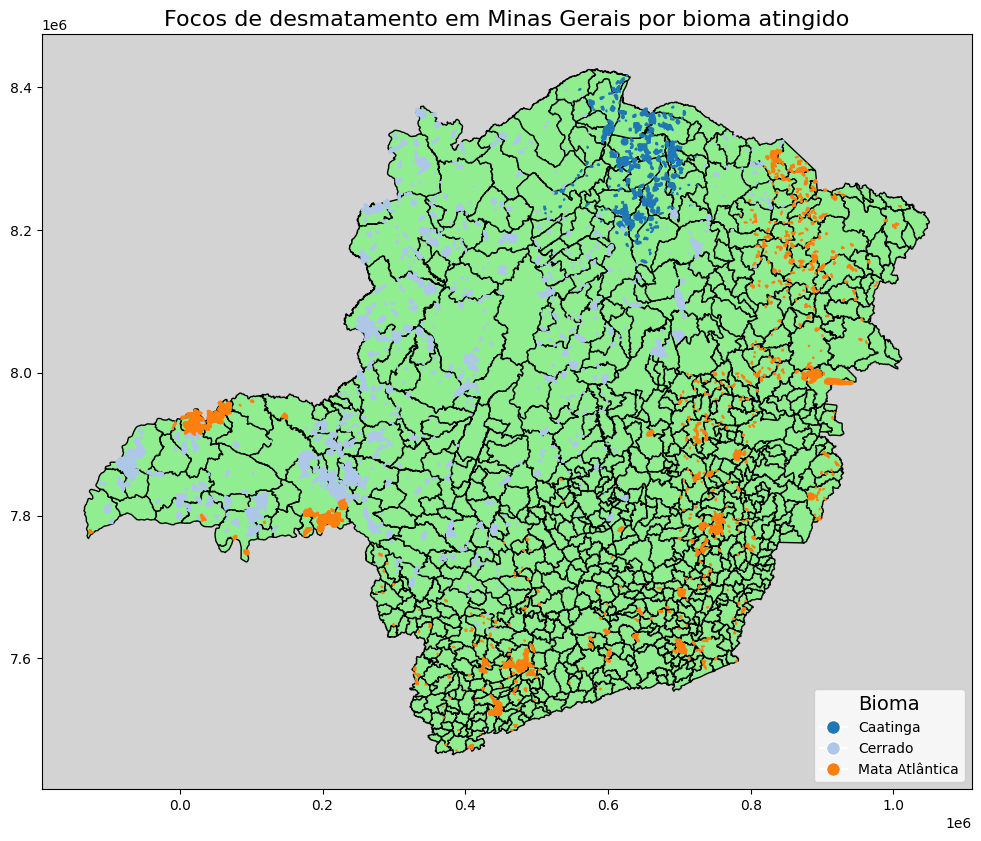

In [8]:
titulo = "Focos de desmatamento em Minas Gerais por bioma atingido"
grupo = "Bioma"
plot_focos_desmatamento(focos_desmatamento_mg, municipios_mg, grupo, titulo)

### Evolução da área desmatada por bioma

**Insights:** A linha do tempo mostra a evolução da área desmatada em diferentes biomas entre agosto e setembro. Mais uma vez, pode-se observar variações significativas na área desmatada no Cerrado ao longo do período analisado.

**Soluções Potenciais:** 

    - Após identificar os biomas que apresentam maior aumento na área desmatada, deve-se direcionar esforços de controle. 
    - O Cerrado mostrou tendências de evolução do processo de desmatamento que requerem a implementaçao de medidas emergenciais para evitar a progressão.

In [9]:
unidade = 'km2'
areas_desmatadas_por_bioma = contabilizar_desmatamento(unidade, focos_desmatamento_mg, ['Mes', 'Bioma'])

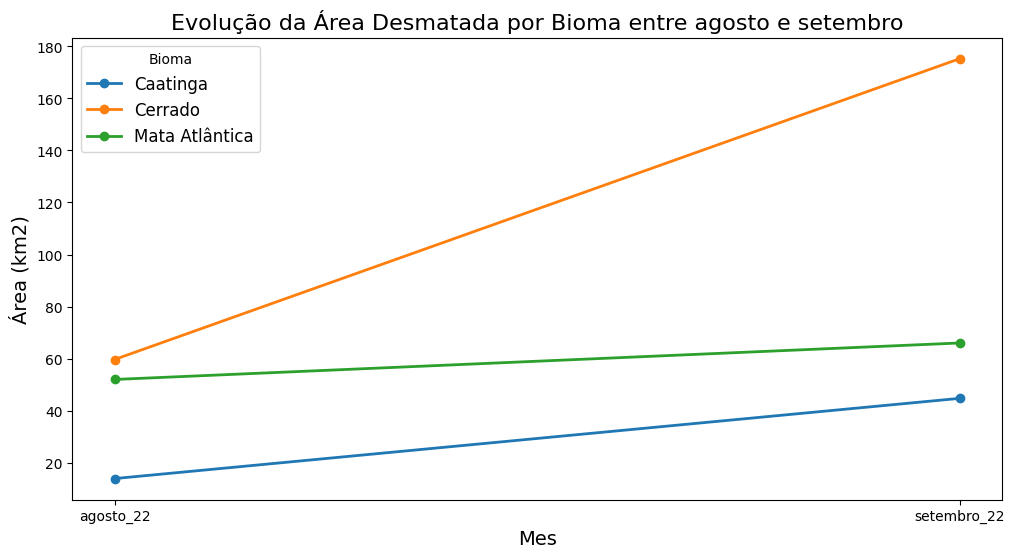

In [10]:
# utilizando os dados gerados pelo relatório
dados_desmatamento = areas_desmatadas_por_bioma.unstack()

# criar uma figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# plotar o gráfico de linhas
dados_desmatamento.plot(kind='line', marker='o', ax=ax, linewidth=2)

# definir os rótulos do eixo x
meses = dados_desmatamento.index
ax.set_xticks(range(len(meses)))
ax.set_xticklabels(meses)

# adicionar títulos e rótulos
plt.title('Evolução da Área Desmatada por Bioma entre agosto e setembro', fontsize=16)
plt.xlabel('Mes', fontsize=14,)
plt.ylabel(f'Área ({unidade})', fontsize=14)
plt.legend(title='Bioma', fontsize=12)

# exibir o gráfico
plt.show()

### Focos de desmatamento em Minas Gerais por área de atuação de Cia. Polícia Militar**

**Insights:** A visualização destaca os focos de desmatamento em Minas Gerais com base na atuação de cada Companhia da Polícia Militar. As áreas com maior incidência de desmatamento podem ser identificadas visualmente.

**Soluções Potenciais:** 

    - Reforçar a atuação das Cia. de Polícia Militar com maior volume de áreas críticas de desmatamento. 
    - Estabelecer estratégias de cooperação entre diferentes órgãos de segurança e fiscalização, para não sobrecarregar os batalhões que estão em áreas com maior ocorrência de desmatamento.

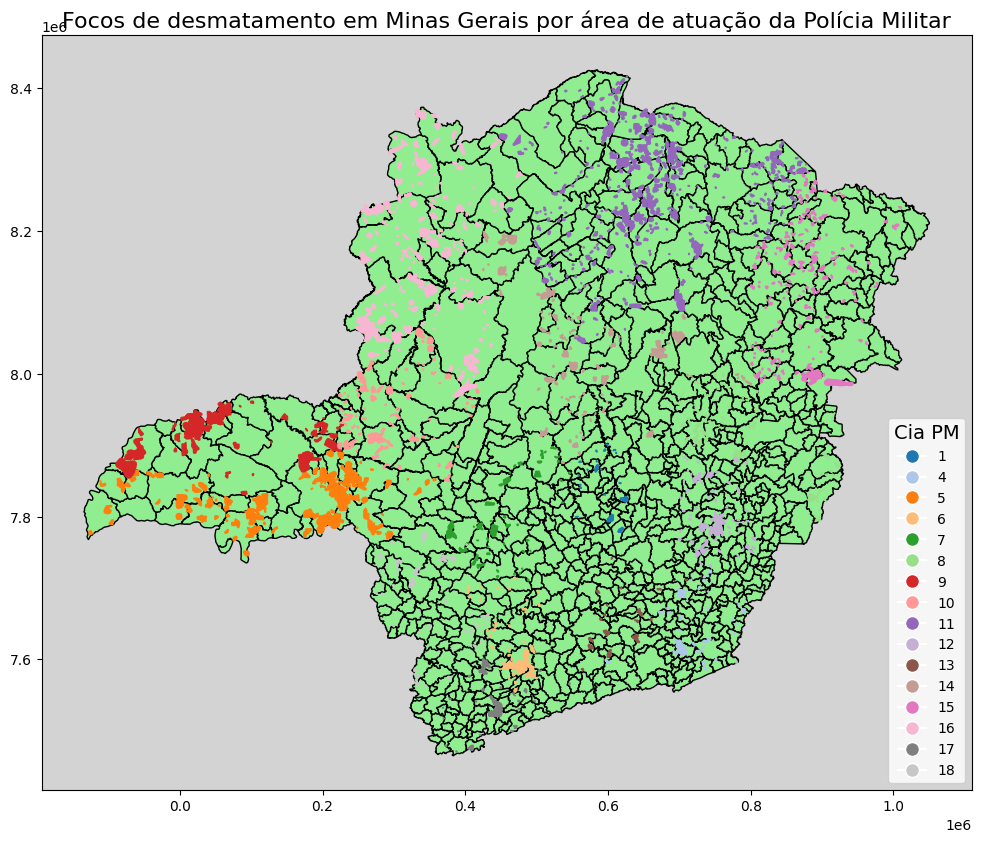

In [11]:
titulo = "Focos de desmatamento em Minas Gerais por área de atuação da Polícia Militar"
grupo = "Cia PM"
plot_focos_desmatamento(focos_desmatamento_mg, municipios_mg, grupo, titulo)

### Top 10 Municípios com maior área desmatada

**Insights:** A visualização destaca os 10 municípios de Minas Gerais com maior área desmatada nos meses de agosto e setembro de 2022. Os municípios estão ordenados de acordo com a área desmatada, permitindo identificar os mais impactados. A diferença entre os meses pode indicar variações sazonais ou eventos específicos de desmatamento.

**Soluções Potenciais:**

    - Concentrar esforços de fiscalização e preservação nos municípios listados.
    - Realizar investigações específicas para compreender as razões por trás das variações entre os meses.
    - Engajar as autoridades locais e a comunidade na implementação de práticas sustentáveis.

In [12]:
# identificar as áreas de desmatamento que tem interseção com os limites municipais
desmatamento_municipios = gpd.overlay(focos_desmatamento_mg, municipios_mg, how='intersection')

# agrupar por mês e município e somar as áreas
area_total_mes_municipio = desmatamento_municipios.groupby(['Mes', 'municipio'])['Area'].sum()

# reorganizar as colunas da serie
area_total_mes_municipio = area_total_mes_municipio.unstack().T

# preencher resultados nulos com 0
area_total_mes_municipio = area_total_mes_municipio.fillna(0)

# calcular o total desmatado por município
area_total_mes_municipio['total_desmatado'] = area_total_mes_municipio['agosto_22'] + area_total_mes_municipio['setembro_22']

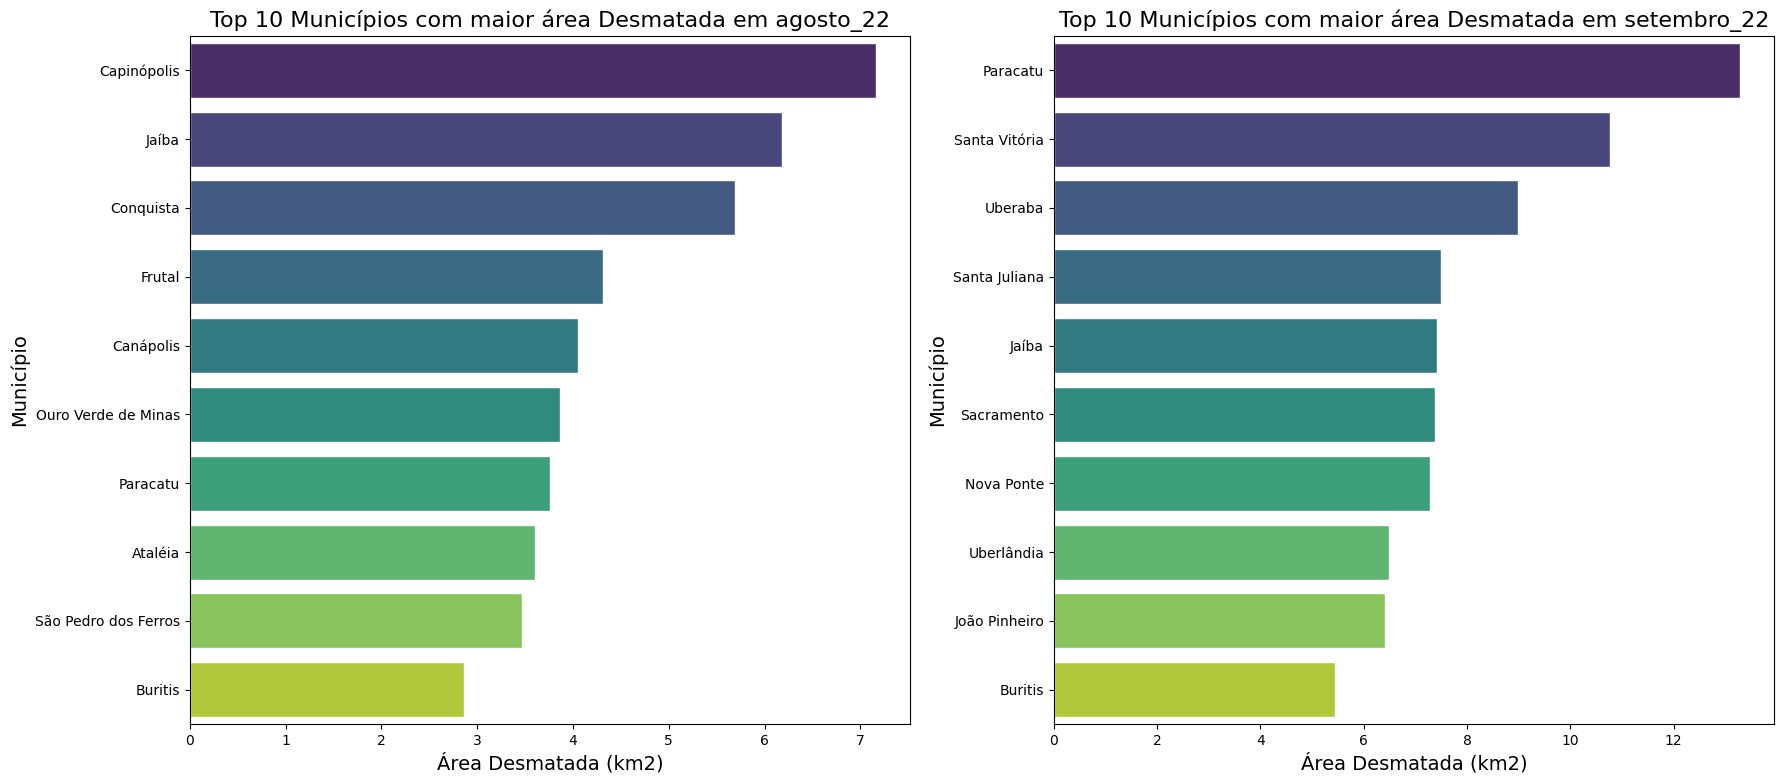

In [13]:
def plot_top_municipios(ax, top_municipios, title):
    # configurar o estilo do gráfico
    sns.set(style='whitegrid')

    # criar o gráfico de barras horizontais no eixo fornecido
    sns.barplot(x=top_municipios, y=top_municipios.index, palette='viridis', orient='h', ax=ax)

    # adicionar rótulos e título
    ax.set_xlabel('Área Desmatada (km2)', fontsize=14)
    ax.set_ylabel('Município', fontsize=14)
    ax.set_title(title, fontsize=16)

def ajusta_tabela_top_10(mes, eixo):
    # ordenar a Série pela coluna
    top_municipios = area_total_mes_municipio[mes].sort_values(ascending=False).head(10)

    # converter a Série para tipo numérico
    top_municipios = pd.to_numeric(top_municipios)

    # plotar o gráfico no eixo definido
    plot_top_municipios(axes[eixo], top_municipios, f'Top 10 Municípios com maior área Desmatada em {mes}')

# criar uma figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

ajusta_tabela_top_10('agosto_22', 0)
ajusta_tabela_top_10('setembro_22', 1)

# ajustar o layout
plt.tight_layout()

# exibir os gráficos
plt.show()

### Mapa de calor da área total Desmatada por município

**Insights:** O mapa de calor destaca os municípios de Minas Gerais com base na área total desmatada entre agosto e setembro de 2022. Municípios com áreas mais escuras representam áreas de desmatamento com maiores incidências de foco de desmatamento no período.

**Soluções Potenciais:**

    - Priorizar ações de preservação e fiscalização nos municípios com áreas mais intensamente desmatadas.
    - Envolvimento das comunidades locais e sensibilização para a importância da preservação ambiental.

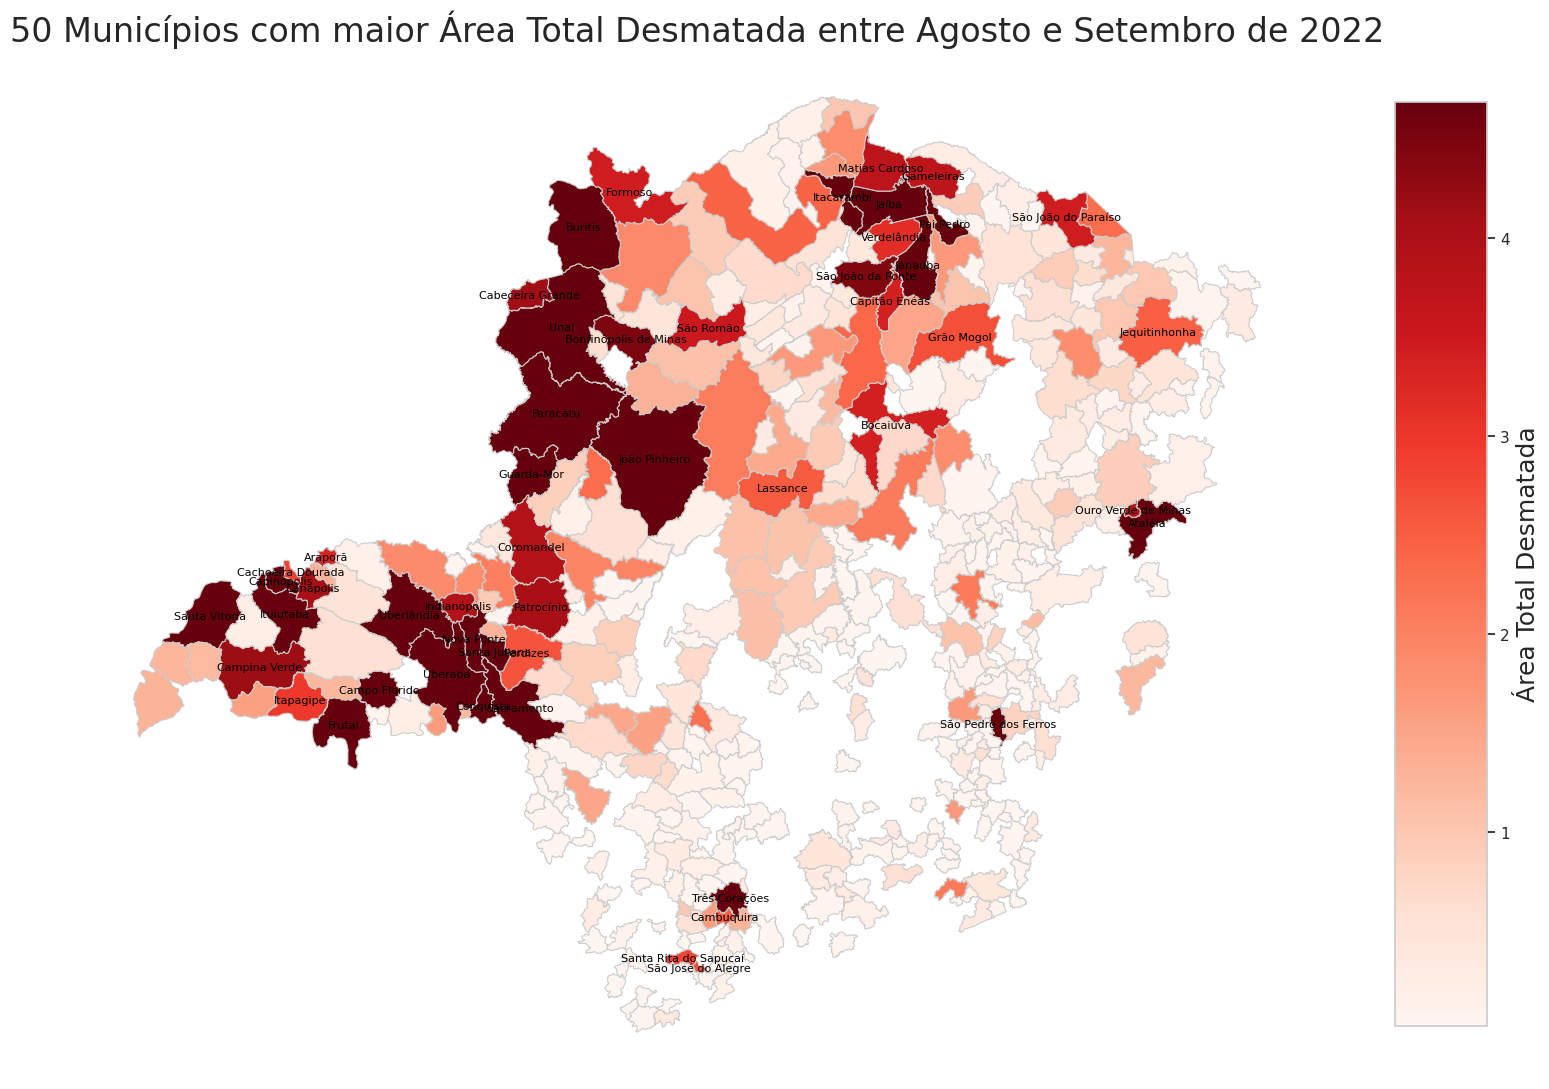

In [14]:
# mesclar com os dados de geometria dos municípios
municipios_desmatamento = pd.merge(municipios_mg, area_total_mes_municipio, left_on='municipio', right_index=True)

# normalizar vmin e vmax com base nos valores de total_desmatado
vmin, vmax = municipios_desmatamento['total_desmatado'].quantile([0.05, 0.95])

# criar figura e eixo
fig, ax = plt.subplots(figsize=(20, 20))

# gerar mapa de calor
plot = municipios_desmatamento.plot(column='total_desmatado', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',
                                    legend_kwds={'label': 'Área Total Desmatada (Km2)'}, vmin=vmin, vmax=vmax)

# adicionar barra de cores
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])  # você precisa definir um array vazio para a escala de cores

# criar a barra de cores
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Área Total Desmatada', fontsize=18)

# exibir o nome dos 50 municípios com maiores áreas desmatadas
top = 50
top_municipios = municipios_desmatamento.nlargest(top, 'total_desmatado')
for idx, row in top_municipios.iterrows():
    plt.annotate(row['municipio'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black',
                 fontsize=8, ha='center', va='center')

# ajustar o título e a visibilidade dos eixos
ax.set_title('50 Municípios com maior Área Total Desmatada entre Agosto e Setembro de 2022', fontsize=24)
ax.set_axis_off()

# Exibir o mapa de calor
plt.show()

## Conclusões Gerais e Recomendações

A análise revela a urgência de estratégias específicas para conter o desmatamento em Minas Gerais. A identificação de biomas prioritários, a atenção aos padrões temporais e o envolvimento ativo de forças de segurança, comunidades e autoridades locais são cruciais. 

Recomenda-se ações imediatas e adaptativas, enfocando os municípios mais afetados, para preservar os ecossistemas e promover a sustentabilidade a longo prazo.